$$\quad$$

이름: 최정우

학번: M2018076

Colab link: https://bit.ly/2XyhEO7

# [SVM; 40p] 선형적으로 분리가 가능한 경우, 다음을 증명하세요.


## A. SVM의 원시 형태 (primal form) 해를 구하는 방법

linear disciminant function $g(\mathbf{x})= \mathbf{w}^T\mathbf{x}+b$

$g(\mathbf{x})$ is proportional to signed distance from $\mathbf{x}$ to hyperplane

scale $\mathbf{w}$ and $\mathbf{b}$ to get following hold:
$$g(\mathbf{x}_+) = +1$$
$$g(\mathbf{x}_\_) = -1$$

support vector : $\mathbf{x}_\_ ,~ \mathbf{x}_+$

the constraints are then

$$g(\mathbf{x}_t)= \mathbf{w}^T\mathbf{x}_t+b \geq +1 \quad for \quad y_t = +1$$ 
$$g(\mathbf{x}_t)= \mathbf{w}^T\mathbf{x}_t+b \leq -1 \quad for \quad y_t = -1$$ 

these can be combined into
$$y_t(\mathbf{w}^T\mathbf{x}_t+b) \geq +1$$ 

support vectors
$$\{\mathbf{x}_t|\mathbf{w}^T\mathbf{x}_t+b=\pm1\}$$

distance$(r)$ from support vector to $H(\mathbf{w},b)$

$$r = {{\mathbf{w}^T\mathbf{x}_t+b}\over{||\mathbf{w}||}} = {{\pm 1}\over{||\mathbf{w}||}}$$

then, the margin is

$$\bigg{|}{{+ 1}\over{||\mathbf{w}||}} - {{- 1}\over{||\mathbf{w}||}}\bigg{|} = {{2}\over{||\mathbf{w}||}}$$

therefore, we want to minimize: $||\mathbf{w}||$

So, we can re-define SVM optimization problem below:

SVM(primal) optimization problem

$$minimize_{\mathbf{w}} ~~ {{1}\over{2}}||\mathbf{w}||^2$$


$$ subject~to ~~y_t(\mathbf{w}^T\mathbf{x}_t+b) \geq 1, ~\forall t \in [1,N] $$

this is a constrained optimization problem:

*   convex quadratic programming
*   linear inequality constraints
*   $d+1$ parameters, N constraints

note: $\mathbf{x} \in \mathbb{R}^d, \mathbf{w} \in \mathbb{R}^d, y \in \mathbb{R}, b \in \mathbb{R}$ , and $N$ training examples

To use QP solver, we need to change SVM optimization problem to Quadratic programming form
$$ 
\mathbf{z} =  
\begin{bmatrix}
b\\
\mathbf{w}
\end{bmatrix}
\in \mathbb{R}^{d+1}
$$

$$
{{1}\over{2}} \mathbf{w}^T \mathbf{w} = 
\begin{bmatrix}
b & \mathbf{w}^T
\end{bmatrix}
\begin{bmatrix}
0 & 0 \\
0 & I \\
\end{bmatrix}
\begin{bmatrix}
b \\
\mathbf{w}^T
\end{bmatrix}
= \mathbf{z}^T
\begin{bmatrix}
0 & 0 \\
0 & I \\
\end{bmatrix}
\mathbf{z}
$$

$$\therefore  Q = 
\begin{bmatrix}
0 & 0 \\
0 & I \\
\end{bmatrix}
,~ c = 0
$$

$$y_t(\mathbf{w}^T\mathbf{x}_t+b) \geq 1 \equiv 
\begin{bmatrix}
y_n & y_n\mathbf{x}_n^T
\end{bmatrix}
\mathbf{z} \geq 1
$$

$$ \Rightarrow 
\begin{bmatrix}
y_1 & y_1\mathbf{x}_1^T \\
\vdots & \vdots \\
y_n & y_n\mathbf{x}_n^T \\
\end{bmatrix}
\mathbf{z} \geq 
\begin{bmatrix}
1 \\
 \vdots \\
1\\
\end{bmatrix}
$$

$$\therefore  A = 
\begin{bmatrix}
y_1 & y_1\mathbf{x}_1^T \\
\vdots & \vdots \\
y_n & y_n\mathbf{x}_n^T \\
\end{bmatrix}
, ~
a = \begin{bmatrix}
1 \\
 \vdots \\
1\\
\end{bmatrix}
$$

Using QP solver to get result
$$\mathbf{z}^* \leftarrow QP(Q,c,A,a)$$

## B. SVM의 이중 형태 (dual form) 해를 구하는 방법

### Step1: compute Lagrangian function

Given SVM(primal) optimization problem is

$$ minimize_\mathbf{w} ~~ {{1}\over{2}}||\mathbf{w}||^2$$
$  $
$$ subject~to ~~y_t(\mathbf{w}^T\mathbf{x}_t+b) \geq 1, ~\forall t \in [1,N] $$

this is a constrained optimization problem:

*   convex quadratic programming
*   linear inequality constraints
*   $d+1$ parameters, N constraints

note: $\mathbf{x} \in \mathbb{R}^d, \mathbf{w} \in \mathbb{R}^d, y \in \mathbb{R}, b \in \mathbb{R}$ , and $N$ training examples

formulate uncontrained optimization using Lagrange multipliers

Lagrangian function is

$$\mathcal{L}(\mathbf{w}, b, \boldsymbol\alpha) = 
{{1}\over{2}}||\mathbf{w}||^2 - \sum^{N}_{t=1} {\alpha_t [y_t(\mathbf{w}^T\mathbf{x}_t+b)-1]}$$

where $\alpha_t \leq 0$ are Lagrange multipliers (aka dual variables)

The solution is determined by saddle point of Lagrangian $\mathcal{L}$

This solution is based on saddle point theorem:

* let $P$ be a constrained optimization problem over $\mathcal{W} = \mathbb{R}^d$

* if $(\mathbf{w}^*, \boldsymbol\alpha^*)$ is saddle point of the associated Lagrangian: i.e., $\forall \mathbf{w} \in \mathbb{R}^d,~ \forall \boldsymbol \alpha \geq 0 ,~ \mathcal{L}(\mathbf{w}^*, \boldsymbol\alpha) \leq \mathcal{L}(\mathbf{w}^*, \boldsymbol\alpha^*) \leq \mathcal{L}(\mathbf{w}, \boldsymbol\alpha^*)$

* then $(\mathbf{w}^*, \boldsymbol\alpha^*)$ is a solution of the problem $P$

thus, Lagrangian $\mathcal{L}(\mathbf{w}, b, \boldsymbol\alpha)$ should be

* minimized with respect to $\mathbf{w}$ and $b \quad [\mathcal{L}({\color{red}{\mathbf{w}^*}}, \boldsymbol\alpha^*) \leq \mathcal{L}({\color{red}{\mathbf{w}}}, \boldsymbol\alpha^*)]$
 
* maximized with respect to $\boldsymbol\alpha \quad [\mathcal{L}(\mathbf{w}^*, {\color{red}{\boldsymbol\alpha}}) \leq \mathcal{L}(\mathbf{w}^*, {\color{red}{\boldsymbol\alpha^*}})]$

### Step2: apply the Karush-Kuhn-Tucker (KKT) conditions

Using KKT condition on Lagrangian function becomes the dual problem

The dual problem requires only maximization with respect to $\boldsymbol \alpha$ subject to $\boldsymbol \alpha \geq 0$

KKT condition:
express primal variables $\mathbf{w}$ and $b$ in terms of dual variable $\boldsymbol \alpha$

\begin{align}
condition~1:\quad& {{\partial\mathcal{L}(\mathbf{w}^*,b^*, \boldsymbol \alpha^*)}\over{\partial \mathbf{w}}} = 0 \\
condition~2:\quad& {{\partial\mathcal{L}(\mathbf{w}^*,b^*, \boldsymbol \alpha^*)}\over{\partial b}} = 0 \\
condition~3:\quad& \alpha_t^*[y_t(\mathbf{w}^{*T}\mathbf{x}_t + b^*) - 1] = 0, ~ \forall t \in [1,N]\\
\end{align}

Given Lagrangian function is

$$ \mathcal{L}(\mathbf{w}, b, \boldsymbol\alpha) = 
{{1}\over{2}}||\mathbf{w}||^2 - \sum^{N}_{t=1} {\alpha_t [y_t(\mathbf{w}^T\mathbf{x}_t+b)-1]}
$$

From condition 1 & 2 :

\begin{align}
&{{\partial \mathcal{L}}\over{\partial \mathbf{w}}} = \mathbf{w} - \sum_{t=1}^{N} \alpha_t y_t \mathbf{x}_t = 0 & \Rightarrow & \quad \mathbf{w}=\sum_{t=1}^{N} \alpha_t y_t \mathbf{x}_t \\
&{{\partial \mathcal{L}}\over{\partial \mathbf{b}}} =  - \sum_{t=1}^{N} \alpha_t y_t = 0 & \Rightarrow &  \quad \sum_{t=1}^{N} \alpha_t y_t = 0 \\
\end{align}

From condition 3:

\begin{align}
\alpha_t >0 &\Rightarrow y_t(\mathbf{w}^{T}\mathbf{x}_t + b^) = 1\\
y_t(\mathbf{w}^{T}\mathbf{x}_t + b) > 1&\Rightarrow \alpha_t =0 \\
\\
\end{align}

$$\therefore \mathbf{w} = \sum_{t=1}^{N} \alpha_t y_t \mathbf{x}_t = \sum_{t=1}^{N_s \ll N} \alpha_t y_t \mathbf{x}_t$$
$$cf. N_s: ~number~of~vectors~associated~with~ \alpha_t >0$$

### Step3: formulate dual problem
Expand Lagrangian function:

$$ \mathcal{L} = 
{{1}\over{2}}||\mathbf{w}||^2 - \sum^{N}_{t=1} {\alpha_t y_t \mathbf{w}^T\mathbf{x}_t}+b\sum^{N}_{t=1}{\alpha_t y_t} +\sum^{N}_{t=1}{\alpha_t}
$$


$$ \mathcal{L} = 
{{1}\over{2}}||\mathbf{w}||^2 - \sum^{N}_{t=1} {\alpha_t y_t \mathbf{w}^T\mathbf{x}_t}+\sum^{N}_{t=1}{\alpha_t}
$$

$$
(\because \sum^{N}_{t=1}{\alpha_t y_t} = 0)
$$

\begin{align}
\mathcal{L} = &
{{1}\over{2}}||\sum^{N}_{t=1} {\alpha_t y_t \mathbf{x}_t}||^2 - \sum^{N}_{t=1} {\alpha_t y_t \bigg(\sum^{N}_{s=1} {\alpha_s y_s \mathbf{x}_s} \bigg)^T\mathbf{x}_t}+\sum^{N}_{t=1}{\alpha_t} \\
 = &
-{{1}\over{2}} \sum^{N}_{s=1} \sum^{N}_{t=1} \alpha_s \alpha_t y_s y_t \mathbf{x}_s^T\mathbf{x}_t +\sum^{N}_{t=1}{\alpha_t} \\
\end{align}

SVM (dual) optimization problem
\begin{align}
{maximize}_\alpha & \quad \sum^{N}_{t=1}{\alpha_t} - {{1}\over{2}} \sum^{N}_{s=1} \sum^{N}_{t=1} \alpha_s \alpha_t y_s y_t \mathbf{x}_s^T\mathbf{x}_t \\
subject~to & \quad \sum^{N}_{t=1}{\alpha_t y_t} = 0\\
&\quad \alpha_t \geq 0, ~ \forall t \in [1,N]
\end{align}

### Step4: solve dual problem

conversion of dual form for QP solver:
\begin{align}
minimize_\alpha &\quad {{1}\over{2}}\boldsymbol \alpha^T Q \boldsymbol \alpha - \mathbf{1}^T \boldsymbol \alpha \\
subject~to &\quad -\boldsymbol \alpha \leq 0\\
&\quad \mathbf{y}^T \boldsymbol \alpha = 0
\end{align}

where
$$Q = 
\begin{bmatrix}
y_1 y_1 \mathbf{x}_1^T \mathbf{x}_1  & y_1 y_2 \mathbf{x}_1^T \mathbf{x}_2  &\cdots  & y_1 y_N \mathbf{x}_1^T \mathbf{x}_N \\
y_2 y_1 \mathbf{x}_2^T \mathbf{x}_1  & y_2 y_2 \mathbf{x}_2^T \mathbf{x}_2  &\cdots  & y_2 y_N \mathbf{x}_2^T \mathbf{x}_N \\
\cdots &\cdots &\cdots & \cdots \\
y_N y_1 \mathbf{x}_N^T \mathbf{x}_1  & y_N y_2 \mathbf{x}_N^T \mathbf{x}_2  &\cdots  & y_N y_N \mathbf{x}_N^T \mathbf{x}_N \\
\end{bmatrix}
$$

final form

\begin{align}
minimize_\alpha &\quad {{1}\over{2}}\boldsymbol \alpha^T 
\begin{bmatrix}
y_1 y_1 \mathbf{x}_1^T \mathbf{x}_1  & y_1 y_2 \mathbf{x}_1^T \mathbf{x}_2  &\cdots  & y_1 y_N \mathbf{x}_1^T \mathbf{x}_N \\
y_2 y_1 \mathbf{x}_2^T \mathbf{x}_1  & y_2 y_2 \mathbf{x}_2^T \mathbf{x}_2  &\cdots  & y_2 y_N \mathbf{x}_2^T \mathbf{x}_N \\
\cdots &\cdots &\cdots & \cdots \\
y_N y_1 \mathbf{x}_N^T \mathbf{x}_1  & y_N y_2 \mathbf{x}_N^T \mathbf{x}_2  &\cdots  & y_N y_N \mathbf{x}_N^T \mathbf{x}_N \\
\end{bmatrix}
\boldsymbol \alpha - \mathbf{1}^T \boldsymbol \alpha \\
subject~to &\quad \mathbf{y}^T \boldsymbol \alpha = 0 \quad (linear~constraint)\\
&\quad 0\leq \boldsymbol \alpha \leq \infty \quad (lower~and~upper~bounds)\\
\end{align}

QP solver will return one $\alpha$ per input point
$$\boldsymbol \alpha = [\alpha_1~\alpha_2~\cdots~\alpha_N]^T$$

### Step5: complete the picture

final solutions

$\boldsymbol \alpha^*$: obtained by solving final form using QP solver

$\mathbf{w}^*:$ linear combination of input vectors in training data

$$ \mathbf{w}^* = \sum_{t=1}^N \alpha^*_t y_t \mathbf{x}_t$$

$b^*$: for any positive and negative support vector ($x_+$ and $x_-$) :

$$ \mathbf{w}^{*T} \mathbf{x}_+ + b = +1$$
$$ \mathbf{w}^{*T} \mathbf{x}_- + b = -1$$

solving these equations gives

$$ b^* = -{{1}\over{2}}(\mathbf{w}^{*T}\mathbf{x}_+ + \mathbf{w}^{*T}\mathbf{x}_-)$$

# [kernel; 20p] 다음의 함수가 valid kernel 임을 보이세요.

## A. 임의의 행렬 A 에 대한 $K(x,z) = x^TA^TAz$

### 풀이

Kernal algebra에 의해서 
$$K(\mathbf{x},\mathbf{v}) = \mathbf{x}^T B \mathbf{v},$$ 

<center>$\quad \quad ~~$When $B$ is positive semi-definite</center>

따라서 $A^TA$ 가 positive semi-definite 라면 주어진 커널은 valid 한 커널이다.
eigenvalue 의 정의에 의해

$$ Ax = \lambda x$$
\begin{align}
A\lambda x &= \lambda (A x)\\
& = \lambda^2 x\\
& = A^2x
\end{align}

positive semi-definite 는 eigenvalue 의 모든값이 음수가 아닌경우이므로 
$A^TA$의 모든 고유값은 음수가 아닌 값을 가지게된다.
$$\because A^2x = \lambda^2 x$$

따라서 주어진 $K(x,z) = x^TA^TAz$ 은 valid kernel이다.



## B. $K(x,z) = (x^Tz+c)^2$

### 풀이

\begin{align}
K(\mathbf{x}, \mathbf{z}) & = \bigg{(} \sum^n_{j=1} x^{(j)} z^{(j)} + c\bigg{)}  \bigg{(} \sum^n_{l=1} x^{(l)} z^{(l)} + c\bigg{)} \\
& = \sum_{j=1}^{n}\sum_{l=1}^{n} x^{(j)} x^{(l)} z^{(j)} z^{(l)} + 2c \sum_{j=1}^{n} x^{(j)} z^{(j)} + c^2 \\
& = \sum_{j,l=1}^{n} (x^{(j)} x^{(l)}) (z^{(j)} z^{(l)}) + \sum_{j=1}^{n} (\sqrt{2c} x^{(j)})( \sqrt{2c} z^{(j)}) + c^2 \\
& = \Phi(\mathbf{x}) \cdot \Phi(\mathbf{z})
\end{align}

$$\Phi(\mathbf{x}) = [x^{(1)2}, x^{(1)}x^{(2)},~..., x^{(3)2}, \sqrt{2c}x^{(1)}, \sqrt{2c}x^{(2)}, \sqrt{2c}x^{(3)}, c ] $$

# [HMM; 40p] 
## It is well known that a DNA sequence is a series of components from ${A, C, G, T}$. Now let’s assume there is one hidden variable $S$ that controls the generation of DNA sequence. $S$ takes 2 possible states $\{S1, S2\}$. Assume the following transition probabilities for HMM M $$P(S1|S1) = 0.8, P(S2|S1) = 0.2, P(S1|S2) = 0.2, P(S2|S2) = 0.8 $$emission probabilities as following $$P(A|S1) = 0.4, P(C|S1) = 0.1, P(G|S1) = 0.4, P(T|S1) = 0.1$$ $$P(A|S2) = 0.1, P(C|S2) = 0.4, P(G|S2) = 0.1, P(T|S2) = 0.4$$ and start probabilities as following $$P(S1) = 0.5, P(S2) = 0.5$$ Assume the observed sequence is $x = CGTCAG$, calculate:


## A. Draw the state diagram of this HMM M and mark the transition probabilities.



In [0]:
# Install library
!sudo apt-get install python-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python-dev is already the newest version (2.7.15~rc1-1).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 8 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32

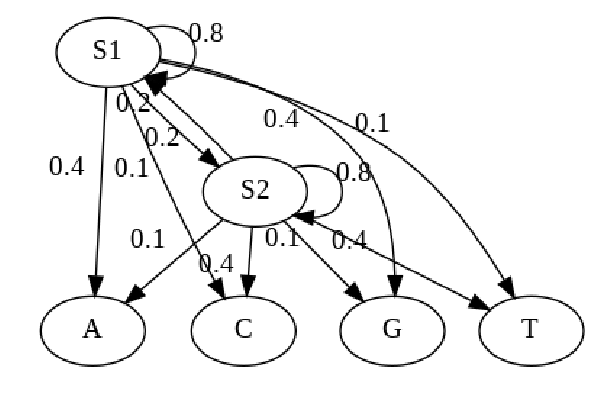

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
from networkx.drawing.nx_agraph import to_agraph 

import networkx as nx

G = nx.MultiDiGraph()

G.add_edge('S1', 'S1', 1, weight=0.8)
G.add_edge('S1', 'S2', 2, weight=0.2)
    
G.add_edge('S2', 'S1', 3, weight=0.2)
G.add_edge('S2', 'S2', 4, weight=0.8)

G.add_edge('S1', 'A', weight=0.4)
G.add_edge('S1', 'C', weight=0.1)
G.add_edge('S1', 'G', weight=0.4)
G.add_edge('S1', 'T', weight=0.1)

G.add_edge('S2', 'A', weight=0.1)
G.add_edge('S2', 'C', weight=0.4)
G.add_edge('S2', 'G', weight=0.1)
G.add_edge('S2', 'T', weight=0.4)

A = to_agraph(G) 
A.layout('dot')      

edge_lbs = nx.get_edge_attributes(G,'weight')
graph = dict(((u, v), edge_lbs[u,v,k]) for u, v, k in edge_lbs)

for pair in graph:
    edge = A.get_edge(pair[0], pair[1])
    edge.attr['label'] = str(graph[pair]) + "  "

A.draw('HMM.png')
img = Image.open('HMM.png')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)

## B. P(x|M) using the forward algorithm. Show your work to get full credit.


In [0]:
# Setup data for processing forward backward algorithm
import numpy as np
import pandas as pd
import networkx as nx

hidden_states = ['S1', 'S2']
pi = [0.5, 0.5]
state_space = pd.Series(pi, index=hidden_states, name='states')
print(state_space)
print('\n', state_space.sum())

S1    0.5
S2    0.5
Name: states, dtype: float64

 1.0


In [0]:
# create hidden transition matrix
# a or alpha 
#   = transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.8, 0.2]
a_df.loc[hidden_states[1]] = [0.2, 0.8]

print(a_df)

a = a_df.values
print('\n', a, a.shape, '\n')
print(a_df.sum(axis=1))

     S1   S2
S1  0.8  0.2
S2  0.2  0.8

 [[0.8 0.2]
 [0.2 0.8]] (2, 2) 

S1    1.0
S2    1.0
dtype: float64


In [0]:
states = ['A', 'C', 'G', 'T']
observable_states = states

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.4, 0.1, 0.4, 0.1]
b_df.loc[hidden_states[1]] = [0.1, 0.4, 0.1, 0.4]

print(b_df)

b = b_df.values
print('\n', b, b.shape, '\n')
print(b_df.sum(axis=1))

      A    C    G    T
S1  0.4  0.1  0.4  0.1
S2  0.1  0.4  0.1  0.4

 [[0.4 0.1 0.4 0.1]
 [0.1 0.4 0.1 0.4]] (2, 4) 

S1    1.0
S2    1.0
dtype: float64


In [0]:
obs_map = {'A':0, 'C':1, 'G':2, "T":3}
obs = np.array([1,2,3,1,0,2])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print( pd.DataFrame(np.column_stack([obs, obs_seq]), 
                columns=['Obs_code', 'Obs_seq']) )

  Obs_code Obs_seq
0        1       C
1        2       G
2        3       T
3        1       C
4        0       A
5        2       G


In [0]:
def forward(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # alpha --> highest probability of any path that reaches state i
    alpha = np.zeros((nStates, T))
    
    # init alpha and phi 
    alpha[:, 0] = pi * b[:, obs[0]]

    print('\nForward Algorithm Process\n')    
   
    print('s={s} and t={t}: alpha[{s}, {t}] = {alpha}'.format(s=0, t=0, alpha=alpha[0, 0]))
    print('s={s} and t={t}: alpha[{s}, {t}] = {alpha}'.format(s=1, t=0, alpha=alpha[1, 0]))

    for t in range(1, T):
        for s in range(nStates):
            alpha[s, t] = np.sum(alpha[:, t-1]* a[:, s]) * b[s, obs[t]] 
            print('s={s} and t={t}: alpha[{s}, {t}] = {alpha}'.format(s=s, t=t, alpha=alpha[s, t]))

    return alpha
alpha = forward(pi, a, b, obs)
print('\n')
df = (pd.DataFrame()
 .assign(alpha = ['t=1','t=2','t=3','t=4','t=5','t=6'])
 .assign(S1 = alpha[0])
 .assign(S2 = alpha[1]))
display(df)
print('\tcf. P(x|M) = alpha')


Forward Algorithm Process

s=0 and t=0: alpha[0, 0] = 0.05
s=1 and t=0: alpha[1, 0] = 0.2
s=0 and t=1: alpha[0, 1] = 0.03200000000000001
s=1 and t=1: alpha[1, 1] = 0.017000000000000005
s=0 and t=2: alpha[0, 2] = 0.002900000000000001
s=1 and t=2: alpha[1, 2] = 0.008000000000000004
s=0 and t=3: alpha[0, 3] = 0.0003920000000000002
s=1 and t=3: alpha[1, 3] = 0.0027920000000000015
s=0 and t=4: alpha[0, 4] = 0.00034880000000000024
s=1 and t=4: alpha[1, 4] = 0.00023120000000000017
s=0 and t=5: alpha[0, 5] = 0.0001301120000000001
s=1 and t=5: alpha[1, 5] = 2.5472000000000023e-05




,alpha,S1,S2
0,t=1,0.050000,0.200000
1,t=2,0.032000,0.017000
2,t=3,0.002900,0.008000
3,t=4,0.000392,0.002792
4,t=5,0.000349,0.000231
5,t=6,0.000130,0.000025


	cf. P(x|M) = alpha


## C. The posterior probabilities $P(\pi_i = S1|x, M)$ for $i = 1, . . . , 6$. Show your work to get full credit.



In [0]:
def backward(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # alpha --> highest probability of any path that reaches state i
    alpha = np.zeros((nStates, T))
    
    # init alpha and phi 
    alpha[:, 0] = pi * b[:, obs[0]]

    # Forward Algorithm Process
    for t in range(1, T):
        for s in range(nStates):
            alpha[s, t] = np.sum(alpha[:, t-1]* a[:, s]) * b[s, obs[t]] 
    

    # Backward Algorithm Process
    beta = np.ones((nStates, T))
    print('s={s} and t={t}: beta[{s}, {t}] = {beta}'.format(s=0, t=5, beta=beta[s, t]))
    print('s={s} and t={t}: beta[{s}, {t}] = {beta}'.format(s=1, t=5, beta=beta[s, t]))
    
    for i, t in enumerate(range(T-2, -1, -1)):
        for s in range(nStates):
            beta[s,t] = np.sum(beta[:, t+1]* a[:, s] * b[:, obs[t+1]])
            print('s={s} and t={t}: beta[{s}, {t}] = {beta}'.format(s=s, t=t, beta=beta[s, t]))

    total = np.sum(alpha[:, 0]*beta[:, 0])
    P = alpha[0,:]*beta[0,:]/total
    return beta, P

beta, P = backward(pi, a, b, obs)

print('\n\n')
df = (pd.DataFrame()
 .assign(beta=['t=1','t=2','t=3','t=4','t=5','t=6'])
 .assign(S1=beta[0])
 .assign(S2=beta[1]))
display(df)
print('\tcf. beta = P(O_t+1,...,O_T|S_i)')
print('\n Posterior')
df = (pd.DataFrame()
 .assign(P_S1=['t=1','t=2','t=3','t=4','t=5','t=6'])
 .assign(S1=P))
display(df)
print('\tcf. P_S1= P(pi_1 = S1| x,M)')

s=0 and t=5: beta[0, 5] = 1.0
s=1 and t=5: beta[1, 5] = 1.0
s=0 and t=4: beta[0, 4] = 0.3400000000000001
s=1 and t=4: beta[1, 4] = 0.16000000000000003
s=0 and t=3: beta[0, 3] = 0.11200000000000003
s=1 and t=3: beta[1, 3] = 0.040000000000000015
s=0 and t=2: beta[0, 2] = 0.012160000000000004
s=1 and t=2: beta[1, 2] = 0.015040000000000006
s=0 and t=1: beta[0, 1] = 0.002176000000000001
s=1 and t=1: beta[1, 1] = 0.005056000000000002
s=0 and t=0: beta[0, 0] = 0.0007974400000000004
s=1 and t=0: beta[1, 0] = 0.0005785600000000003





,beta,S1,S2
0,t=1,0.000797,0.000579
1,t=2,0.002176,0.005056
2,t=3,0.012160,0.015040
3,t=4,0.112000,0.040000
4,t=5,0.340000,0.160000
5,t=6,1.000000,1.000000


	cf. beta = P(O_t+1,...,O_T|S_i)

 Posterior


,P_S1,S1
0,t=1,0.256273
1,t=2,0.447552
2,t=3,0.226656
3,t=4,0.282188
4,t=5,0.762238
5,t=6,0.836281


	cf. P_S1= P(pi_1 = S1| x,M)


## D. The most likely path of hidden states using the Viterbi algorithm. Show your work to get full credit.

In [38]:
def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    
    for t in range(T-2, -1, -1):
        path[t] = phi[int(path[t+1]), [t+1]]
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)
df = (pd.DataFrame()
 .assign(delta=['t=1','t=2','t=3','t=4','t=5','t=6'])
 .assign(S1=delta[0])
 .assign(S2=delta[1]))
display(df)


Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 1.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 1.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 1.0
s=0 and t=4: phi[0, 4] = 1.0
s=1 and t=4: phi[1, 4] = 1.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 1.0
--------------------------------------------------
Start Backtrace

path[4] = 0.0
path[3] = 1.0
path[2] = 1.0
path[1] = 1.0
path[0] = 1.0

single best state path: 
 [1. 1. 1. 1. 0. 0.]
delta:
 [[5.000000e-02 1.600000e-02 1.280000e-03 1.024000e-04 1.310720e-04
  4.194304e-05]
 [2.000000e-01 1.600000e-02 5.120000e-03 1.638400e-03 1.310720e-04
  1.048576e-05]]
phi:
 [[0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1.]]


,delta,S1,S2
0,t=1,0.050000,0.200000
1,t=2,0.016000,0.016000
2,t=3,0.001280,0.005120
3,t=4,0.000102,0.001638
4,t=5,0.000131,0.000131
5,t=6,0.000042,0.000010


In [0]:
state_map = {0:'S1', 1:'S2'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,C,S2
1,G,S2
2,T,S2
3,C,S2
4,A,S1
5,G,S1
